In [9]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

### $Curve$ $Fitting$ $for$ $O_7$

$\begin{align} \mu &= 1 + \frac{N \lambda P_a}{2l\Delta{P}} \\ \\ \Delta{P} &= \frac{\lambda P_a}{2l(\mu-1)}N \end{align}$

In [16]:
pressure = [300, 276, 250, 228, 206, 184, 160, 138, 114, 94, 72]
expdata = pd.DataFrame({'n': np.arange(0,22,2),'P (mmHg)': pressure})
expdata['ΔP (mmHg)'] = expdata.loc[0,'P (mmHg)'] - expdata['P (mmHg)']

P_a = 753
λ = 692e-9
#λ = 632.8e-9
l = 80e-3

expdata.to_csv("mu_he-ne", index=False)
expdata

,n,P (mmHg),ΔP (mmHg)
0,0,300,0
1,2,276,24
2,4,250,50
3,6,228,72
4,8,206,94
5,10,184,116
6,12,160,140
7,14,138,162
8,16,114,186
9,18,94,206


μ = 1.000282


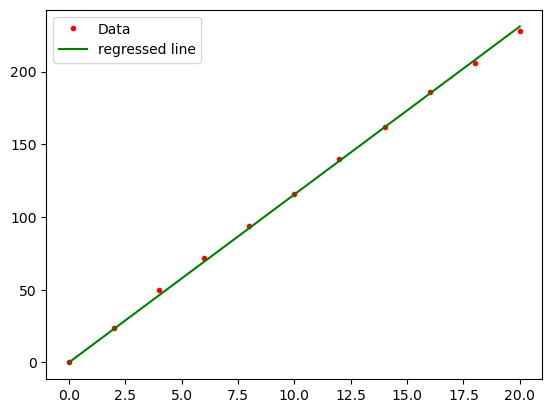

In [17]:
x = expdata['n'].to_numpy()
y = expdata['ΔP (mmHg)'].to_numpy()

def formula(n,μ):
    return ((λ*P_a)/(2*l*(μ-1)))*n

parameter, parameter_covariance = curve_fit(formula, x, y, [1.01])
print(f'μ =', round(parameter[0],6))

x_opt = np.linspace(0, x[-1], 10)
y_opt = formula(x_opt , parameter[0])

plt.plot(x, y, '.', color='red', label='Data')
plt.plot(x_opt, y_opt, '-', color="green", label="regressed line")
plt.legend()
plt.show()

In [19]:
expdata['n*ΔP'] = expdata['n']*expdata['ΔP (mmHg)']
expdata['n*n'] = expdata['n']* expdata['n']
expdata['sum(n*ΔP)'] = expdata['n*ΔP'].sum()
expdata['sum(n*n)'] = expdata['n*n'].sum()
expdata['m'] = expdata['sum(n*ΔP)']/expdata['sum(n*n)']
expdata['e'] = expdata['ΔP (mmHg)'] - expdata['m']*expdata['n'] # error =  y_exp - mx
expdata['e^2'] = expdata['e']**2
expdata['RSS'] = expdata['e^2'].sum()
expdata['sqrt(variance)'] = np.sqrt(expdata['RSS']/(10-1))
    
expdata.to_csv("mu_he-ne", index=False)
expdata

,n,P (mmHg),ΔP (mmHg),n*ΔP,n*n,sum(n*ΔP),sum(n*n),m,e,e^2,RSS,sqrt(variance)
0,0,300,0,0,0,17784,1540,11.548052,0.000000,0.000000,41.444156,2.145905
1,2,276,24,48,4,17784,1540,11.548052,0.903896,0.817028,41.444156,2.145905
2,4,250,50,200,16,17784,1540,11.548052,3.807792,14.499281,41.444156,2.145905
3,6,228,72,432,36,17784,1540,11.548052,2.711688,7.353253,41.444156,2.145905
4,8,206,94,752,64,17784,1540,11.548052,1.615584,2.610113,41.444156,2.145905
5,10,184,116,1160,100,17784,1540,11.548052,0.519481,0.269860,41.444156,2.145905
6,12,160,140,1680,144,17784,1540,11.548052,1.423377,2.026001,41.444156,2.145905
7,14,138,162,2268,196,17784,1540,11.548052,0.327273,0.107107,41.444156,2.145905
8,16,114,186,2976,256,17784,1540,11.548052,1.231169,1.515777,41.444156,2.145905
9,18,94,206,3708,324,17784,1540,11.548052,-1.864935,3.477983,41.444156,2.145905
